In [20]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [21]:
dataset = pd.read_csv('tempo.csv')
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [22]:
#Explorando e ajustando a coluna aparencia
aparencia = dataset.groupby(['Aparencia']).size()
aparencia

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

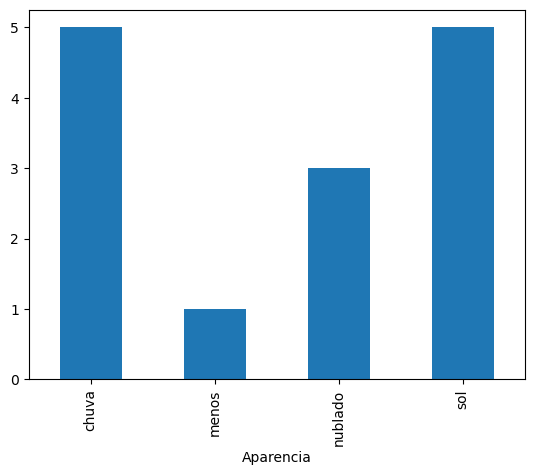

In [23]:
aparencia.plot.bar()

In [24]:
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = 'sol'

In [25]:
aparencia = dataset.groupby(['Aparencia']).size()
aparencia

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

<Axes: xlabel='Aparencia'>

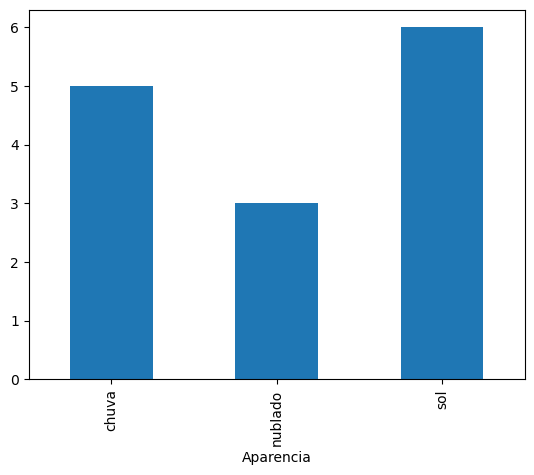

In [26]:
aparencia.plot.bar()

In [27]:
#Explorando e ajustando a coluna temperatura
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

<Axes: >

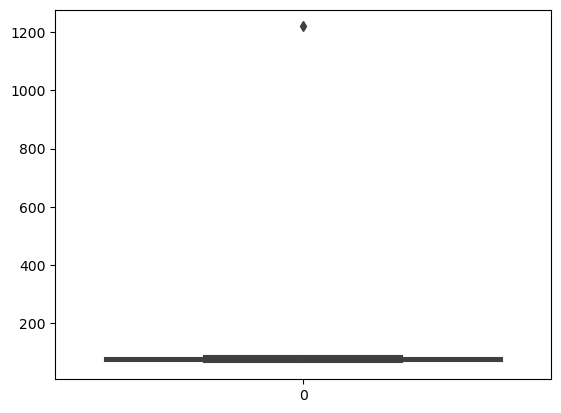

In [28]:
srn.boxplot(dataset['Temperatura'])

In [34]:
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

<Axes: >

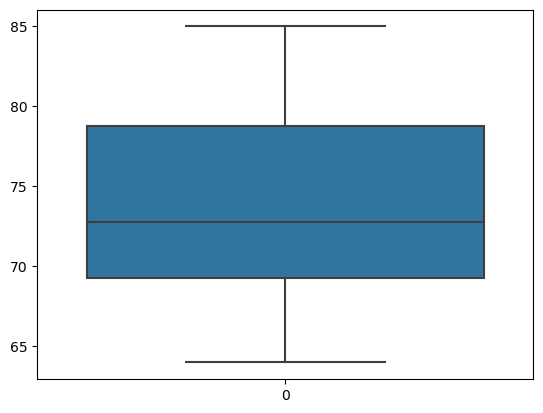

In [35]:
dataset.loc[(dataset['Temperatura'] > 200, 'Temperatura')] = mediana
srn.boxplot(dataset['Temperatura'])

In [29]:
#Verificando valores NaN
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [30]:
#Explorando e ajustando a coluna vento
vento = dataset.groupby(['Vento']).size()
vento

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [36]:
dataset['Vento'].fillna('FALSO', inplace=True)

In [37]:
umidade = dataset.groupby(['Umidade']).size()
umidade

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
85.5     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

In [38]:
dataset['Umidade'].fillna(sts.median(dataset['Umidade']), inplace=True)

In [39]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

In [40]:
dataset.head(15)

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,sol,64.0,65.0,VERDADEIRO,sim
7,sol,73.5,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
9,chuva,75.0,200.0,FALSO,sim
